EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Completar`
  - `# Completar`
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import statistics
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
#Importamos el url
url = "https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv"
df = pd.read_csv(url)
df.head()

,Series Name,Series Code,Country Name,Country Code,2023 [YR2023]
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Afghanistan,AFG,2.71088679128353
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Albania,ALB,3.93662525742167
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Algeria,DZA,4.10000000000004
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,American Samoa,ASM,..
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Andorra,AND,2.58355480961319


In [3]:
#Eliminamos las columnas
df.drop(columns=['Country Code', 'Series Code'], inplace=True)

In [4]:
df.describe()

,Series Name,Country Name,2023 [YR2023]
count,4256,4256,4256
unique,16,266,2835
top,GDP growth (annual %),Afghanistan,..
freq,266,16,1374


Como vemos, el "Series Name" puede tomar 16 valores distintos. Lo debemos pasar a formato Wide, teniendo una columna para cada uno de ellos, tomando el valor que aparece en 2023 [YR2023]

In [5]:
# Transformamos de long a wide
df = df.pivot(index="Country Name", columns="Series Name", values="2023 [YR2023]")

In [6]:
# Dejamos una columna de índice para tener disponible la de Pais.
df.reset_index(inplace=True)

In [7]:
df.head()

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
1,Africa Eastern and Southern,1.93287526195653,35.9298385263195,24.3483372544611,14.285851632509,25.4254224001233,2.32013780158925,5.80516538196113,6.10657347896149,6.08028700896879,..,29.1304853698777,44.3959450802976,0.471789673271105,23.4925994471713,..,22.9754549072797
2,Africa Western and Central,3.80482687815641,23.7057568350145,..,12.9874441377748,61.3705691120184,3.3547328190002,..,5.69176863421842,14.9934752391386,..,6.76897203140647,54.1428772898838,3.17153807284374,4.3390849886261,..,36.2200117483328
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937


### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [8]:
elim_list = """ - "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World" """


In [9]:
# for entry in elim_list: Primero separa a cada país eliminando \n
# Luego, remueve '-' y despues las """", solo si hay algo (if entry).

elim_list = [entry.strip('- ').strip('"') for entry in elim_list.split("\n") if entry]

In [10]:
# eliminamos las columnas
df = df[~df["Country Name"].isin(elim_list)]

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [11]:
df = df.replace("..", np.nan)

In [12]:
# Transformamos a numéricas
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors="coerce")

In [13]:
df.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,195.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,3.241160,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,6.641153,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,1.168088,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,4.987486,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

In [14]:
# Obtenemos una lista con las columnas
columnas = df.select_dtypes(include=['number']).columns
len(columnas)

16

Vamos a agrupar los gráficos en grupos de cinco.

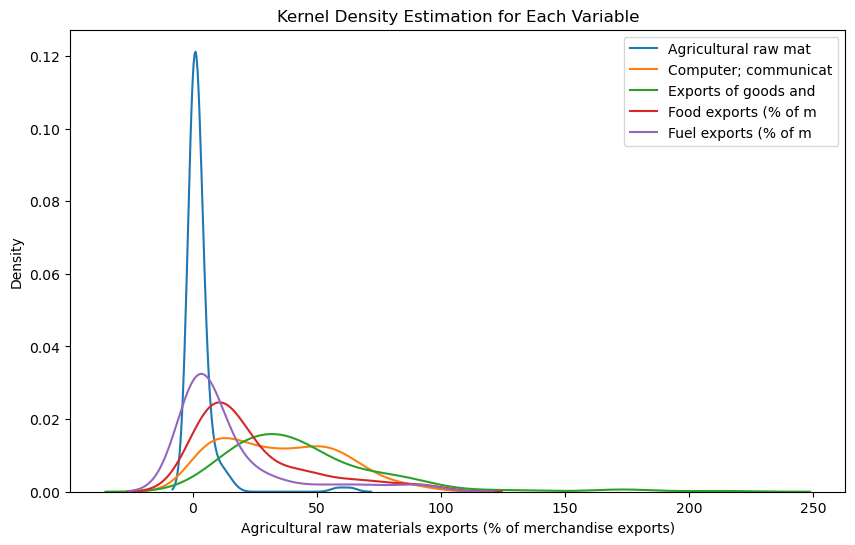

In [15]:
plt.figure(figsize=(10, 6))
for column in columnas[0:5]:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Densidad")
plt.show()

Dentro de este grupo de variables, vemos que Agricultural Raw Materials es muy concentrada, a diferencia del resto. Sin embargo, todas parecen tener una única cresta, a diferencia de Computer/Comunications, que tiene dos máximos locales.

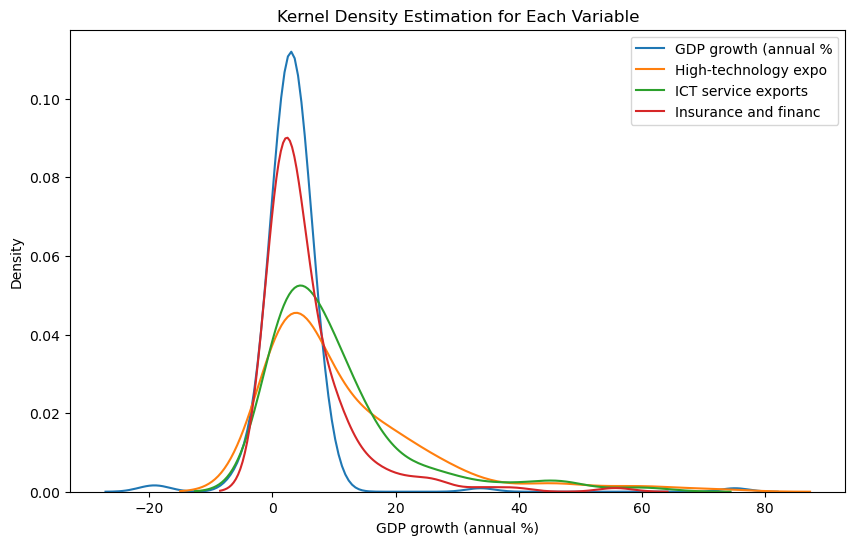

In [16]:
plt.figure(figsize=(10, 6))
for column in columnas[5:10]:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Densidad")
plt.show()

Estas variables se comportan de manera similar, todas en general tendiendo a un valor. Podemos ver que GDP growth tiene la menor varianza, o en otras palabras, está más concentrada.

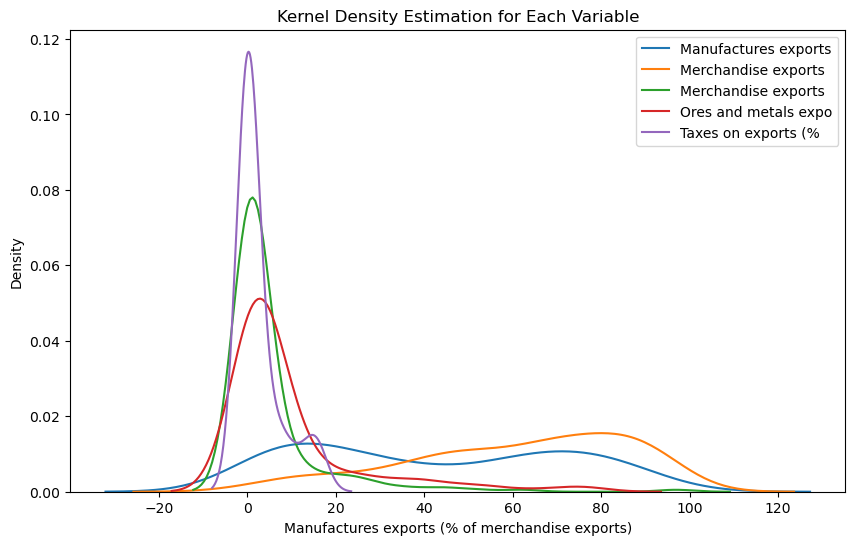

In [17]:
plt.figure(figsize=(10, 6))
for column in columnas[10:15]:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Densidad")
plt.show()

Finalmente, podemos notar que las variables Manufactures exports (to low/middle income) y Merchandise exports son muy variables, están muy poco concentradas. Al estar más diluídas, la imputación de valores faltantes será un poco más complicada

## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


Podemos notar que la columna de international tourism es todo missing, por lo que no tiene sentido mantenerla.

In [19]:
df.drop(columns="International tourism; receipts (% of total exports)", inplace=True)

Comenzamos teniendo los siguientes valores missing para cada variable:

In [21]:
missing_counts = df.isna().sum()
print(missing_counts)

Series Name
Country Name                                                                                                           0
Agricultural raw materials exports (% of merchandise exports)                                                         68
Computer; communications and other services (% of commercial service exports)                                         56
Exports of goods and services (% of GDP)                                                                              59
Food exports (% of merchandise exports)                                                                               68
Fuel exports (% of merchandise exports)                                                                               72
GDP growth (annual %)                                                                                                 22
High-technology exports (% of manufactured exports)                                                                   70
ICT service exports 

Lo primero que vamos a hacer es lo siguiente: inputaremos datos faltantes como el promedio de los países vecinos. La idea es poder llenar los NA con valores que sean ojalá lo más fidedignos posibles pero también no perjudicar la naturaleza de la varianza para mantener la mayor información, cosa que no se lograría si inputamos todos los faltantes con la media o la mediana.

In [22]:
url = "https://raw.githubusercontent.com/raul12101/Tarea-2-Machine-Learning-/refs/heads/main/country_neighbours.json"

# Obtenemos el diccionario creado en el otro notebook (country_neighbours.ipynb).
# Se decidió hacerlo así debido a que geopandas toma tiempo instalar, y también tarda unos segundos
# en obtener el diccionario.
response = requests.get(url)
neighbours_dict = response.json()

print(neighbours_dict)

{'Indonesia': ['Malaysia', 'East Timor', 'Papua New Guinea'], 'Malaysia': ['Indonesia', 'Thailand', 'Brunei'], 'Chile': ['Bolivia', 'Peru', 'Argentina', 'Southern Patagonian Ice Field'], 'Bolivia': ['Chile', 'Peru', 'Argentina', 'Brazil', 'Paraguay'], 'Peru': ['Chile', 'Bolivia', 'Brazil', 'Ecuador', 'Colombia'], 'Argentina': ['Chile', 'Bolivia', 'Brazil', 'Uruguay', 'Paraguay', 'Brazilian Island', 'Southern Patagonian Ice Field'], 'Dhekelia Sovereign Base Area': ['Cyprus', 'Northern Cyprus', 'Cyprus No Mans Area'], 'Cyprus': ['Dhekelia Sovereign Base Area', 'Cyprus No Mans Area', 'Akrotiri Sovereign Base Area'], 'India': ['China', 'Bhutan', 'Pakistan', 'Myanmar', 'Bangladesh', 'Nepal', 'Siachen Glacier'], 'China': ['India', 'North Korea', 'Bhutan', 'Kazakhstan', 'Tajikistan', 'Mongolia', 'Russia', 'Vietnam', 'Laos', 'Kyrgyzstan', 'Pakistan', 'Myanmar', 'Afghanistan', 'Nepal', 'Hong Kong S.A.R.', 'Siachen Glacier'], 'Israel': ['Palestine', 'Lebanon', 'Syria', 'Jordan', 'Egypt'], 'Pales

Realizamos el ajuste a la media de los países vecinos, de existir:

In [23]:
for key_country in neighbours_dict:
    if key_country in df["Country Name"].values:
        for variable in df.columns:
            # La file del pais correspondiente
            country_data = df[df["Country Name"] == key_country]
            
            #Esta línea de código es importante. Nos dice que, si (1) encuentra un NA en alguna de las variables
            #para (2) el país estudiado, entonces inicie el código.
            if not country_data.empty and country_data[variable].isna().values[0]:
                proxy_list = []
                #Lo que hace el código es agrupar los valores de esta variable para sus países vecinos
                #La idea es luego tomar el promedio de esta lista.
                for neighbour in neighbours_dict.get(key_country):
                    neighbour_data = df[df["Country Name"] == neighbour]
                    if not neighbour_data.empty and not neighbour_data[variable].isna().values[0]:
                        value = neighbour_data[variable].values[0]
                        proxy_list.append(value)
                
                # Solo calculamos el promedio si hay valores en la lista
                if len(proxy_list) > 0:
                    proxy_val = statistics.mean(proxy_list)
                    df.loc[df["Country Name"] == key_country, variable] = df.loc[df["Country Name"] == key_country, variable].fillna(proxy_val)

Nuestros missings antes eran:

In [24]:
print(missing_counts)

Series Name
Country Name                                                                                                           0
Agricultural raw materials exports (% of merchandise exports)                                                         68
Computer; communications and other services (% of commercial service exports)                                         56
Exports of goods and services (% of GDP)                                                                              59
Food exports (% of merchandise exports)                                                                               68
Fuel exports (% of merchandise exports)                                                                               72
GDP growth (annual %)                                                                                                 22
High-technology exports (% of manufactured exports)                                                                   70
ICT service exports 

Y ahora después del cambio:

In [25]:
missing_counts_1 = df.isna().sum()
print(missing_counts_1)

Series Name
Country Name                                                                                                           0
Agricultural raw materials exports (% of merchandise exports)                                                         36
Computer; communications and other services (% of commercial service exports)                                         32
Exports of goods and services (% of GDP)                                                                              36
Food exports (% of merchandise exports)                                                                               36
Fuel exports (% of merchandise exports)                                                                               38
GDP growth (annual %)                                                                                                 13
High-technology exports (% of manufactured exports)                                                                   37
ICT service exports 

Vemos que hemos recuperado bastantes datos, en algunas variables hemos reducido los missings incluso hasta la mitad. Para deshacernos de todos los missings, se va ahora sí a inputar por media o mediana.

La decisión de una u otra depende de su distribución. Preferiremos la mediana en aquellas más concentradas y que tienden a un solo máximo, como por ejemplo:

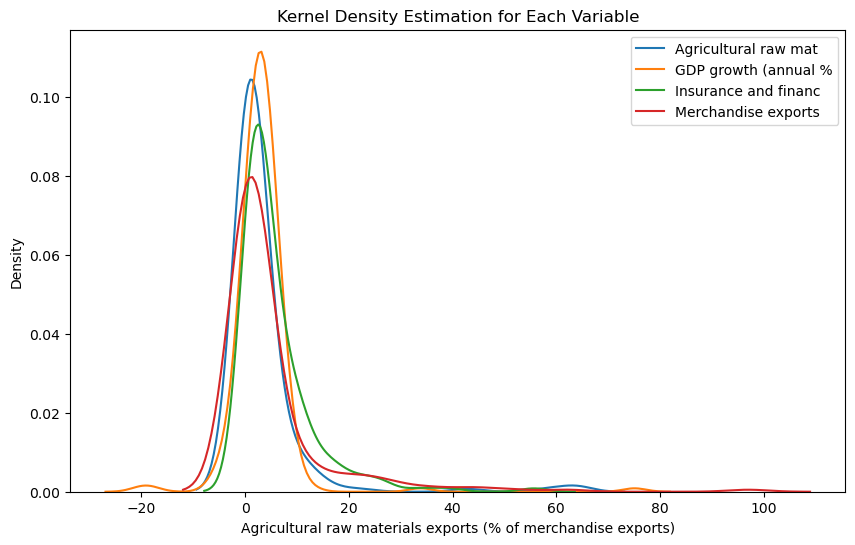

In [27]:
low_variance_vars = ['Agricultural raw materials exports (% of merchandise exports)', 'GDP growth (annual %)', 
                    'Insurance and financial services (% of service exports; BoP)', 
                    'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)']
# 'Taxes on exports (% of tax revenue)' ?

plt.figure(figsize=(10, 6))
for column in low_variance_vars:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Densidad")
plt.show()

En este caso, como dijimos, preferimos la mediana ya que es el valor al que tiende la distribución por estar sesgada:

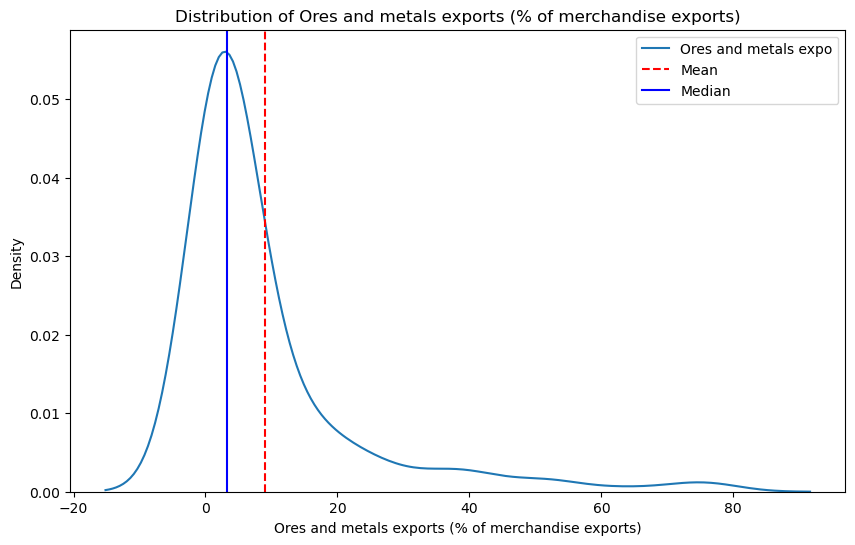

In [28]:
plt.figure(figsize=(10, 6))

column = 'Ores and metals exports (% of merchandise exports)'
sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

# Calculate mean and median
mean_value = df[column].mean()
median_value = df[column].median()

# Overlay mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='blue', linestyle='-', label='Median')

# Add legend and title
plt.legend()
plt.title(f'Densidad de {column}')

plt.show()

Hacemos el ajuste:

In [29]:
median_vars = ['Agricultural raw materials exports (% of merchandise exports)', 'GDP growth (annual %)', 
                    'Insurance and financial services (% of service exports; BoP)', 
                    'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
                    'Food exports (% of merchandise exports)',
                    'Exports of goods and services (% of GDP)', "Fuel exports (% of merchandise exports)",
                    'High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)',
                    'Ores and metals exports (% of merchandise exports)', 'Transport services (% of commercial service exports)',
                    'Taxes on exports (% of tax revenue)']

for var in median_vars:
    median_var = df[var].median()
    df[var] = df[var].fillna(median_var)

In [30]:
missing_counts_2 = df.isna().sum()
print(missing_counts_2)

Series Name
Country Name                                                                                                          0
Agricultural raw materials exports (% of merchandise exports)                                                         0
Computer; communications and other services (% of commercial service exports)                                        32
Exports of goods and services (% of GDP)                                                                              0
Food exports (% of merchandise exports)                                                                               0
Fuel exports (% of merchandise exports)                                                                               0
GDP growth (annual %)                                                                                                 0
High-technology exports (% of manufactured exports)                                                                   0
ICT service exports (% of se

Ahora nos haremos cargo de las que faltan, las cuales tienen mayor varianza y no tienden a un valor en específico. En este caso, preferimos usar la media ya que, para esta situación, sería más representativa que la mediana.

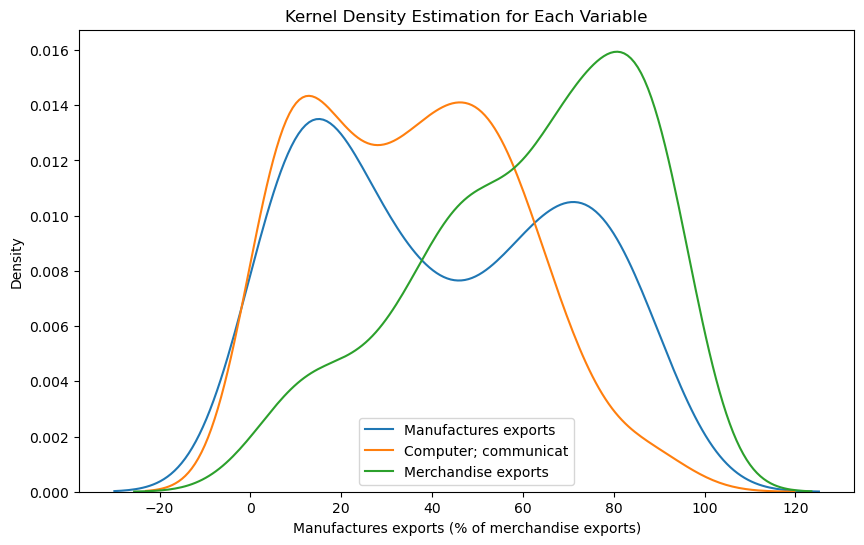

In [31]:
high_variance_vars = ["Manufactures exports (% of merchandise exports)",
                      "Computer; communications and other services (% of commercial service exports)",
                     "Merchandise exports to high-income economies (% of total merchandise exports)"]

plt.figure(figsize=(10, 6))
for column in high_variance_vars:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Densidad")
plt.show()

In [32]:
for var in high_variance_vars:
    mean_var = df[var].median()
    df[var] = df[var].fillna(mean_var)

Y finalmente, logramos dejar la base sin missings: 

In [33]:
missing_counts_3 = df.isna().sum()
print(missing_counts_3)

Series Name
Country Name                                                                                                         0
Agricultural raw materials exports (% of merchandise exports)                                                        0
Computer; communications and other services (% of commercial service exports)                                        0
Exports of goods and services (% of GDP)                                                                             0
Food exports (% of merchandise exports)                                                                              0
Fuel exports (% of merchandise exports)                                                                              0
GDP growth (annual %)                                                                                                0
High-technology exports (% of manufactured exports)                                                                  0
ICT service exports (% of service ex

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

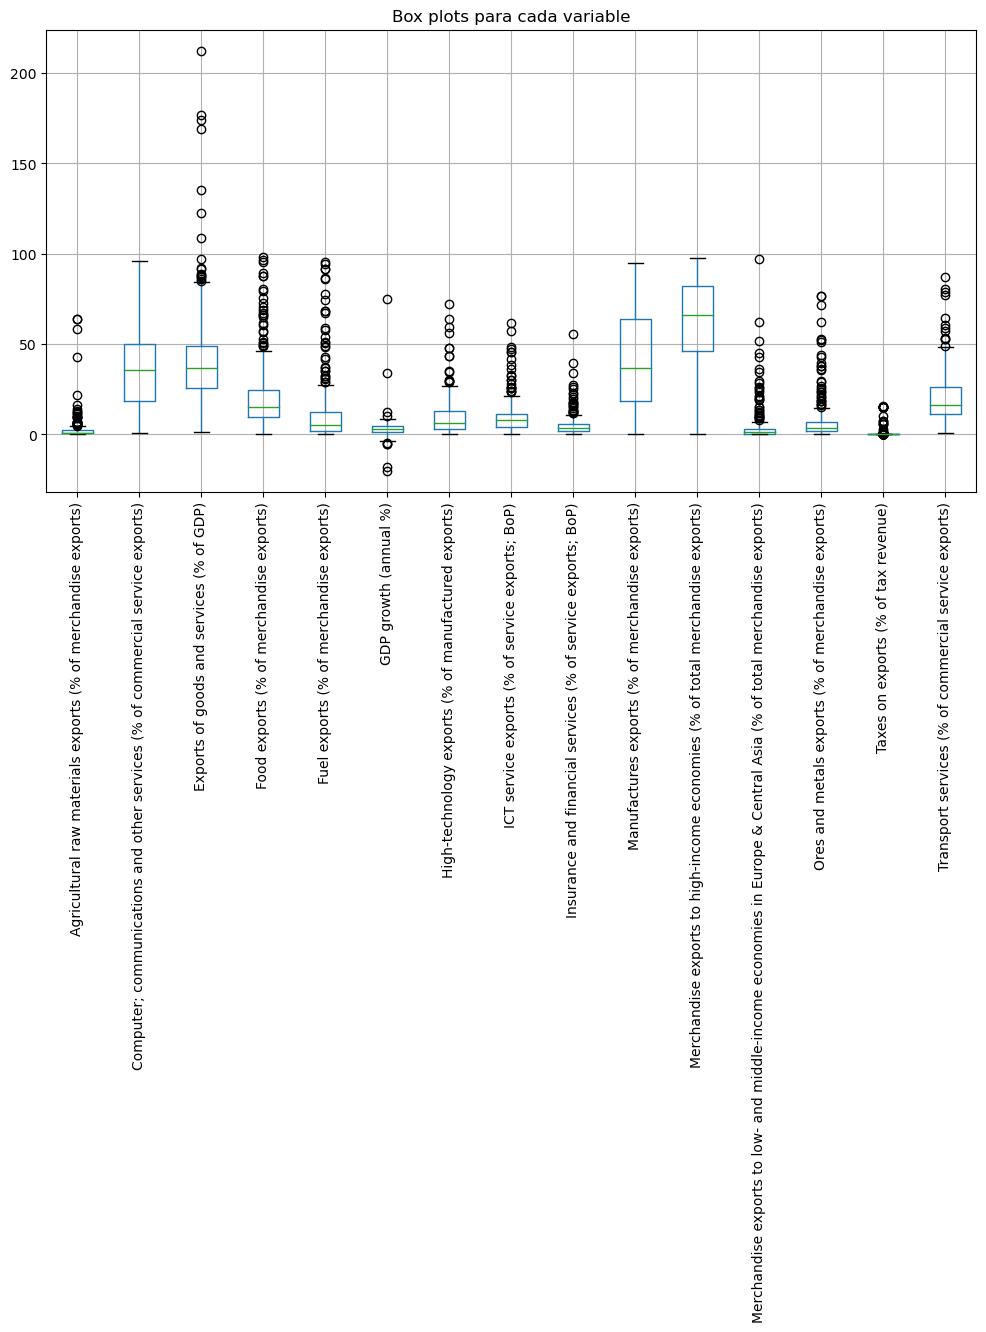

In [34]:
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=90)  # Rotamos para mejor visibilidad
plt.title("Box plots")
plt.show()

----------
Como se aprecia en el box plot, casi todas las variables presentan valores extraordinarios. El primero que nos llama la atención es la presencia de países que en tan solo un año crecieron más del 30% (incluso más del 50%) del PIB. ¿Es esto posible?

Hay evidencia que sí. El caso de Guyana, por ejemplo, refleja un altísimo crecimiento para el año 2023 debido a un boom en su industria del aceite (Lee, 2023). Así mismo, Macao exhibe enormes cifras debido al la recuperación post pandemia (Statistics and Census Service, 2024).

Fuentes:
Lee, Y. S. (2023). World's fastest growing economy Guyana could grow 100% in 5 years. CNBC.
Statistics and Census Service. (2024). Economic outlook of Macao: 2023 report.

-----------

Para nuestro caso, los datos lo reflejan también:

In [35]:
df[df["Country Name"]=="Guyana"][["Country Name", "GDP growth (annual %)"]]

Series Name,Country Name,GDP growth (annual %)
98,Guyana,33.802617


In [36]:
df[df["Country Name"]=="Macao"][["Country Name", "GDP growth (annual %)"]]

Series Name,Country Name,GDP growth (annual %)
147,Macao,75.061377


Sin embargo, como se trata de una ocurrencia extraordinara, no quisiéramos que sesgasen nuestra estimación

In [37]:
df = df.drop(df[df["Country Name"] == "Macao"].index)
df = df.drop(df[df["Country Name"] == "Guyana"].index)

Asumimos lo mismo para aquellas muy negativas:

In [38]:
df.drop(df[df["GDP growth (annual %)"] < -4].index, inplace=True)


Otro caso raro es el de Gambia, que tiene altísimos índices de exportaciones de mercancía a países de bajo ingreso en Europa y Asia central.

Pareciera ser que, aunque suele ser una gran categoría para ellos, sería algo anormal tal valor en específico.

fuente: https://www.indexmundi.com/facts/the-gambia/indicator/TX.VAL.MRCH.R2.ZS

In [39]:
df[df["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"] > 80]

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
86,Gambia,1.779909,1.12411,9.604496,75.293976,0.0,4.797509,2.34231,0.421716,0.083597,4.585357,0.154107,96.94967,18.340758,0.243333,17.149678


Por lo tanto, lo eliminamos

In [40]:
df = df.drop(df[df["Country Name"] == "Gambia"].index)

-------
En otro caso, vemos observaciones mayores al 150% del PIB en exportaciones de bienes y servicios. ¿Es esto posible?

Sí. Países pequeños pero de mucha riqueza como Singapur y Luxemburgo han presentado consistentemente altos números de exportaciones sobre PIB.

Fuente: https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS?locations=SG-LU

-------

En nuestra data:

In [41]:
df[df["Country Name"]=="Singapore"][["Country Name", "Exports of goods and services (% of GDP)"]]

Series Name,Country Name,Exports of goods and services (% of GDP)
212,Singapore,174.300145


In [42]:
df[df["Country Name"]=="Luxembourg"][["Country Name", "Exports of goods and services (% of GDP)"]]

Series Name,Country Name,Exports of goods and services (% of GDP)
146,Luxembourg,212.530618


Debido a que se trata de algo sostenido en el tiempo, no lo consideraremos outlier. 

## Feature Engineering


Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas No Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.

### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [43]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

In [44]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
df_scaled = df_scaled.set_index(df["Country Name"])
display(df_scaled)

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
Country Name,,,,,,,,,,,,,,,
Afghanistan,0.130325,0.548085,-0.913594,-0.575667,-0.158413,-0.122309,0.053873,0.591432,-0.356935,0.369736,-2.007012,0.583161,0.496878,3.935091,0.524483
Albania,-0.322969,-0.550869,-0.143981,-0.472402,-0.308794,0.351449,-0.813875,-0.729086,-0.688372,0.595957,0.687626,1.657219,-0.196447,-0.287525,-0.645098
Algeria,-0.129551,1.144719,-0.672957,-0.323059,-0.204032,0.414595,-0.370383,-0.811443,0.710656,-0.182111,0.790373,0.221064,0.941583,-0.287525,0.303190
American Samoa,-0.259823,0.004695,-0.216504,-0.323217,-0.362982,-0.049981,-0.347361,-0.220702,-0.308964,-0.180614,0.498402,-0.392631,-0.357554,-0.287525,-0.288623
Andorra,-0.321833,-1.114669,-0.231717,-0.996995,-0.639733,-0.171524,0.996178,-0.591807,-0.242551,2.082316,0.939270,-0.150160,-0.464537,-0.274506,-1.249858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,-0.259823,0.004695,1.561605,-0.323217,-0.362982,0.780399,-0.347361,-0.220702,-0.308964,-0.180614,0.239829,-0.392997,-0.357554,-0.287525,-0.288623
Virgin Islands (U.S.),-0.259823,0.004695,-0.216504,-0.323217,-0.362982,-0.049981,-0.347361,-0.220702,-0.308964,-0.180614,0.200060,-0.366355,-0.357554,-0.287525,-0.288623
Yemen,-0.357251,-1.241991,0.367555,-0.922162,1.297535,-1.062734,-0.629342,-0.530043,-0.364762,-1.003591,-2.537333,2.200912,-0.318520,-0.287525,0.309684


Debido a que solo tenemos variables numéricas, decidimos solo emplear estandarización.

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



Text(0.5, 1.0, 'Elbow curve')

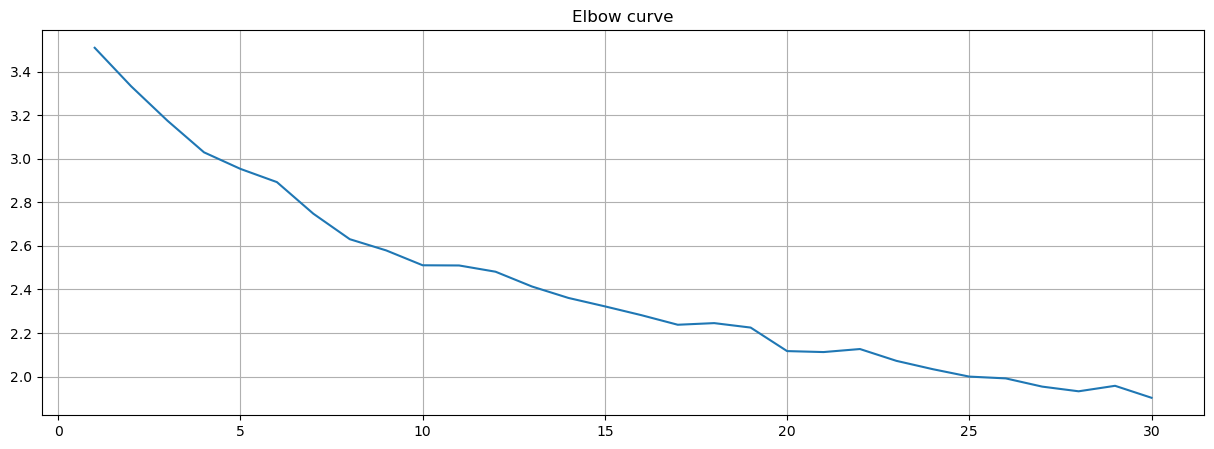

In [45]:
dispersion = []
for k in range(1, 31):
  model = KMeans(n_clusters=k, n_init='auto')
  model.fit(df_scaled)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df_scaled, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df_scaled)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 31), dispersion)
plt.grid(True)
plt.title('Elbow curve')




---

El comportamiento de la curva es de caída lenta, y no cuenta con un "codo" muy claro o establecido.

Aún así, podemos creer que alrededor de nueve estaría bien. Pasar de nueve a diez nos otorga muy poca información extra, mientras que entre diez y once, once es peor. Entonces, escaneando de izquierda a derecha, llegar a nueve parece apropiado.


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


In [46]:
df_scaled.columns

Index(['Agricultural raw materials exports (% of merchandise exports)',
       'Computer; communications and other services (% of commercial service exports)',
       'Exports of goods and services (% of GDP)',
       'Food exports (% of merchandise exports)',
       'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)',
       'High-technology exports (% of manufactured exports)',
       'ICT service exports (% of service exports; BoP)',
       'Insurance and financial services (% of service exports; BoP)',
       'Manufactures exports (% of merchandise exports)',
       'Merchandise exports to high-income economies (% of total merchandise exports)',
       'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
       'Ores and metals exports (% of merchandise exports)',
       'Taxes on exports (% of tax revenue)',
       'Transport services (% of commercial service exports)'],
      dtype='object', name='Seri

In [47]:
def elbow(df):
    dispersion = []
    for k in range(1, 31):
      model = KMeans(n_clusters=k, n_init='auto')
      model.fit(df)
      #Distancia euclidiana para cada par (dato - centro del cluster)
      dist_ecl = cdist(df, model.cluster_centers_, 'euclidean')
      #Tomamos la distancia mínima (al centroide más cercano)
      min_dist = np.min(dist_ecl, axis=1)
      #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
      average_dis = sum(min_dist)/len(df)
      dispersion.append(average_dis)
    return dispersion

Text(0.5, 1.0, 'Elbow curve')

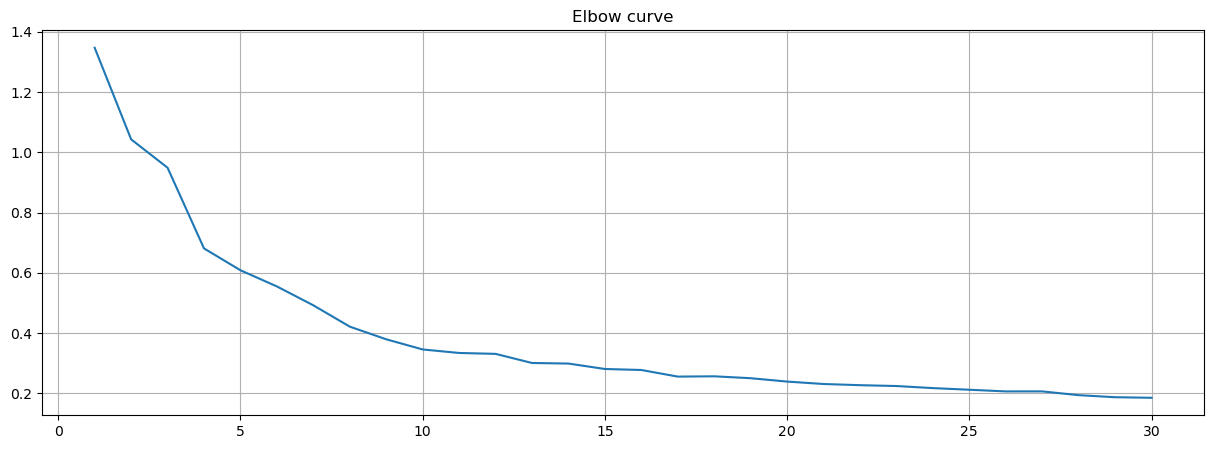

In [48]:
# Grupo 1: Fuel exports, Manufactures Exports, Agricultural raw materials exports
grupo1 = ["Fuel exports (% of merchandise exports)", "Manufactures exports (% of merchandise exports)",
          "Agricultural raw materials exports (% of merchandise exports)"]
dispersion = elbow(df_scaled[grupo1])

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 31), dispersion)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

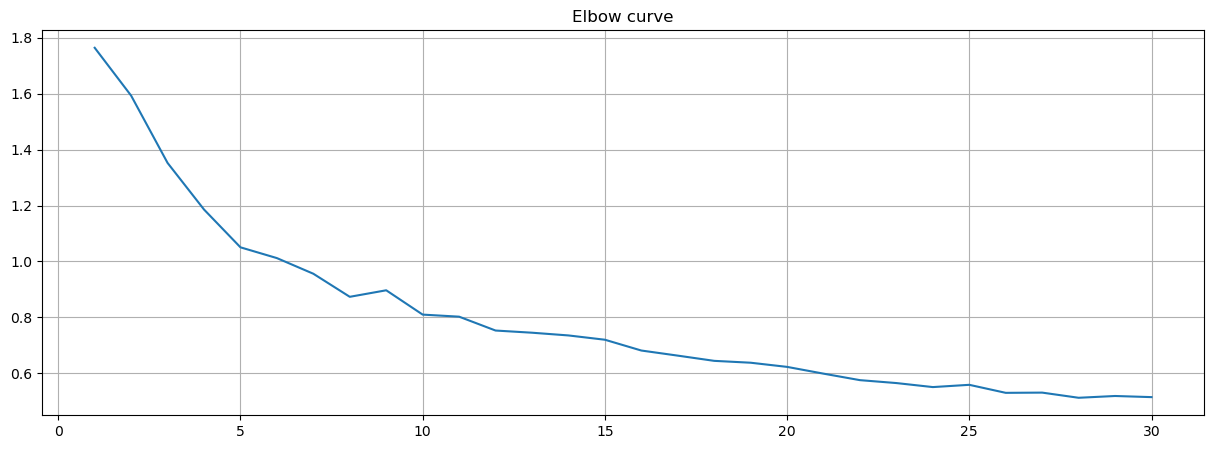

In [49]:
# Grupo 2: Fuel exports, Computer; communications and other services, Merchandise exports to high-income economies, Ores and metals exports
grupo2 = ["Fuel exports (% of merchandise exports)", "Computer; communications and other services (% of commercial service exports)",
          "Merchandise exports to high-income economies (% of total merchandise exports)", "Ores and metals exports (% of merchandise exports)"]
dispersion = elbow(df_scaled[grupo2])

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 31), dispersion)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

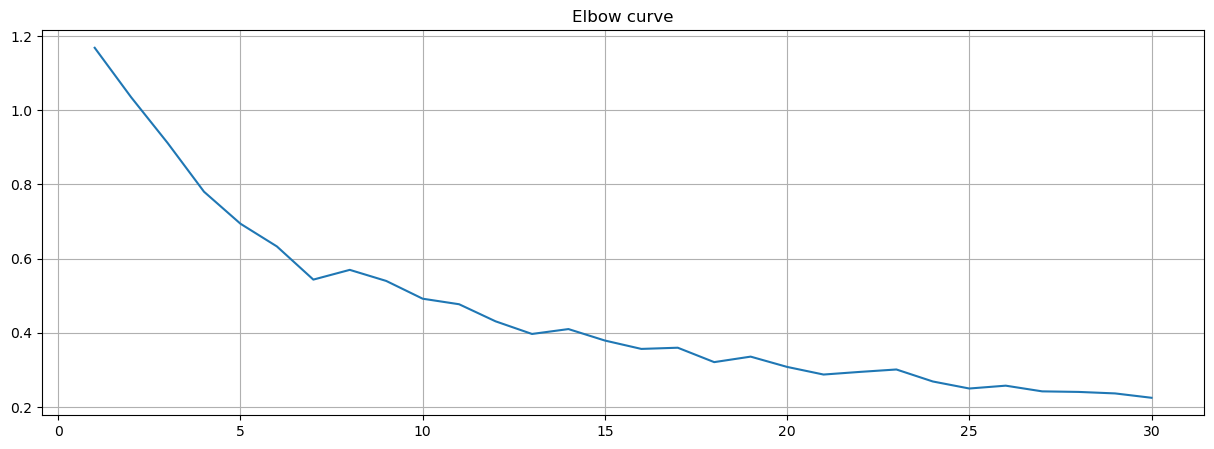

In [50]:
# Grupo 3: Insurance, Goods and services, Agricultural raw materials exports
grupo3 = ["Insurance and financial services (% of service exports; BoP)", 'Agricultural raw materials exports (% of merchandise exports)', 
        "Exports of goods and services (% of GDP)" ]

dispersion = elbow(df_scaled[grupo3])

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 31), dispersion)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

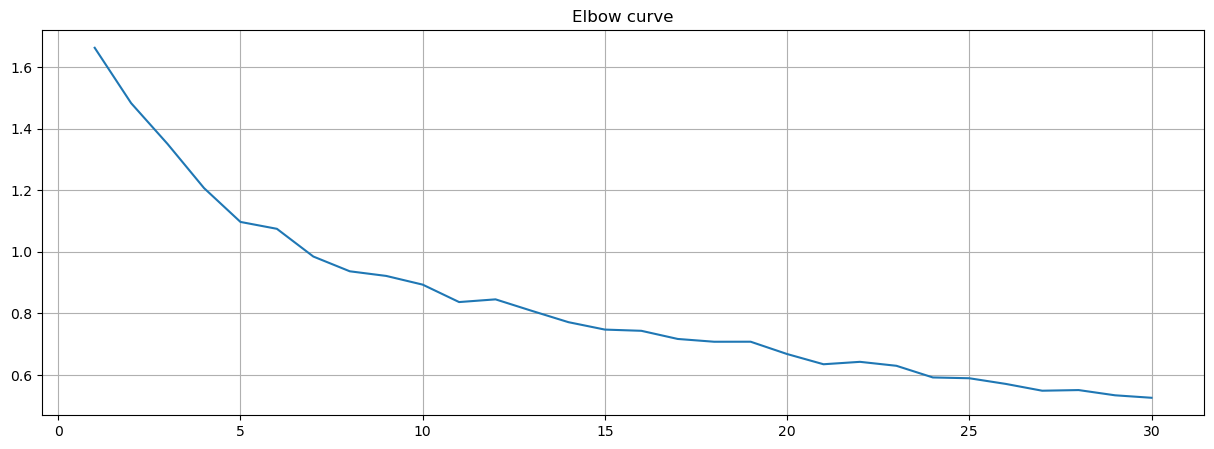

In [51]:
# Grupo 4: 
grupo4 = ['Ores and metals exports (% of merchandise exports)', 'Insurance and financial services (% of service exports; BoP)',
          'Transport services (% of commercial service exports)', 'GDP growth (annual %)']

dispersion = elbow(df_scaled[grupo4])

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 31), dispersion)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

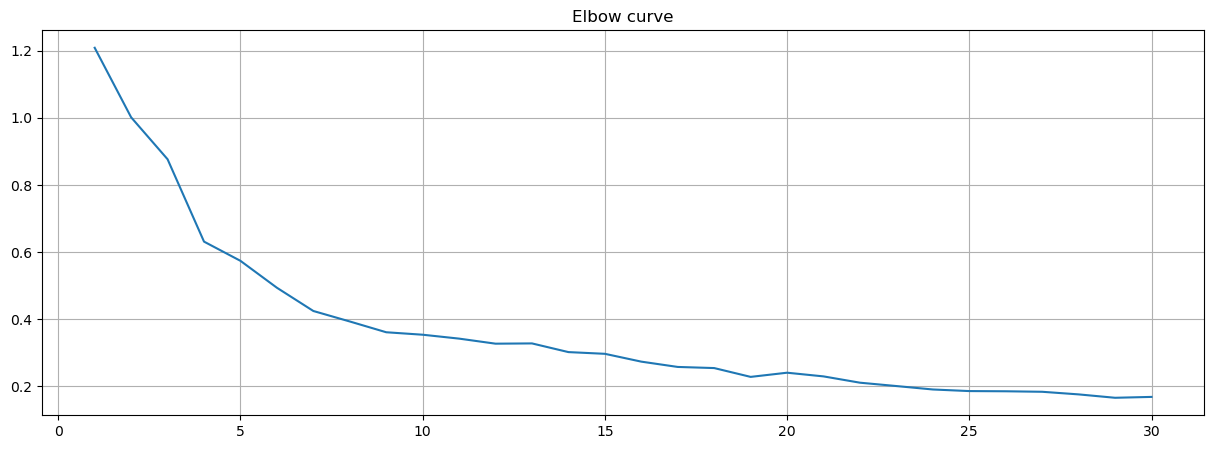

In [52]:
grupo5 = ["Fuel exports (% of merchandise exports)", "Ores and metals exports (% of merchandise exports)",
          "Agricultural raw materials exports (% of merchandise exports)"]

dispersion = elbow(df_scaled[grupo5])

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 31), dispersion)
plt.grid(True)
plt.title('Elbow curve')

---


De todos los grupos, el que mejor parece segmentar es el primer grupo. Se ve un codo más pronunciado, y se observan distancias más pequeñas que en los otros gráficos (< 0.4 en el k óptimo).

Se eligieron estas variables debido a que la guerra impacta en el suministro de energía y petróleo, lo que afectaría a las empresas manufactureras y, por otro lado, a aquellos enfocados en la agricultura, puesto a que serían ventajas comparativas distintas entre países.

---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


In [53]:
# Grupo escogido: Grupo 1: Fuel exports, Manufactures Exports, Agricultural raw materials exports
comb_cols = ["Fuel exports (% of merchandise exports)", "Manufactures exports (% of merchandise exports)",
          "Agricultural raw materials exports (% of merchandise exports)"]

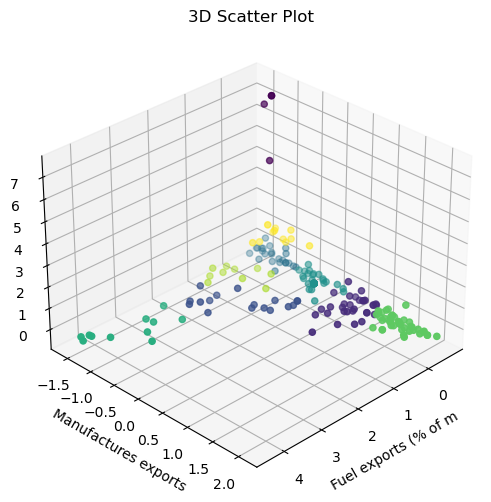

In [54]:
model = KMeans(n_clusters=9, n_init='auto')
model.fit(df_scaled[comb_cols])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = comb_cols[0]
y = comb_cols[1]
z = comb_cols[2]

# Scatter plot
ax.scatter(df_scaled[x], df_scaled[y], df_scaled[z], c=model.labels_, cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel(x[:20])
ax.set_ylabel(y[:20])
ax.set_zlabel(z[:20])
ax.set_title("3D Scatter Plot")

ax.view_init(elev=30, azim=45) 
plt.show()

---


*Escriba* su respuesta en esta celda...


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


In [55]:
# Realizamos PCA para graficar los resultados:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
var_exp = pca.explained_variance_ratio_
print(var_exp)
print('El total de la varianza explicada por PCA: ',round(sum(var_exp),4)*100,'%')

[0.17025186 0.11923925]
El total de la varianza explicada por PCA:  28.95 %


In [56]:
df_pca = pd.DataFrame(df_pca)
df_pca = df_pca.set_index(df["Country Name"])
display(df_pca)

,0,1
Country Name,,
Afghanistan,0.758326,1.874071
Albania,0.136424,-0.107126
Algeria,0.169580,-0.011969
American Samoa,-0.207389,-0.642065
Andorra,-1.821313,0.004116
...,...,...
Viet Nam,-0.310326,-0.042134
Virgin Islands (U.S.),-0.110236,-0.582650
Yemen,1.785543,1.718216


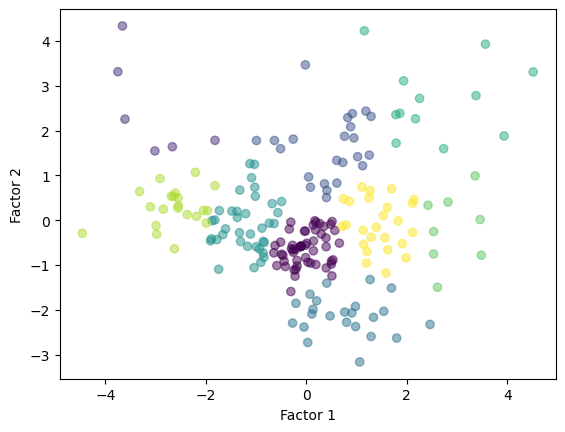

In [57]:
model = KMeans(n_clusters=9, n_init='auto')
model.fit(df_pca)
# Realicemos un scatter plot de los datos
plt.scatter(df_pca[0], df_pca[1], alpha=0.5, c=model.labels_)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

In [58]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)
df_pca = df_pca.set_index(df["Country Name"])

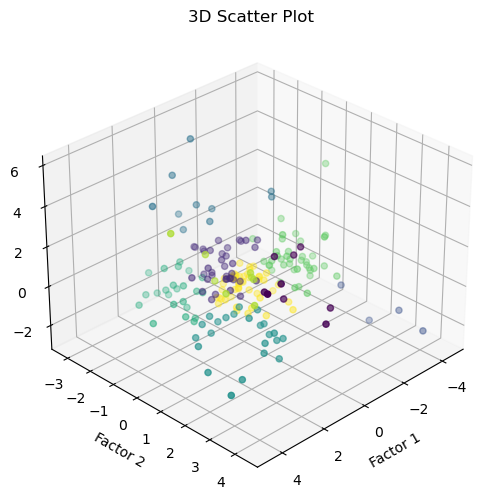

In [59]:
model = KMeans(n_clusters=9, n_init='auto')
model.fit(df_pca)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = df_pca[0]
y = df_pca[1]
z = df_pca[2]

# Scatter plot
ax.scatter(x, y, z, c=model.labels_, cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
ax.set_zlabel("Factor 3")
ax.set_title("3D Scatter Plot")

ax.view_init(elev=30, azim=45) 
plt.show()

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [60]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


Lo transformamos a una columna de Pandas:

In [62]:
continent = pd.DataFrame(country_continent_mapping, index = country_continent_mapping.keys())
continent = continent.T
continent.rename(columns={"Albania": "Continent"}, inplace=True)
continent = continent["Continent"]

In [63]:
df_withcontinent = df_scaled
df_withcontinent["Continent"] = continent
df_withcontinent.dropna(inplace=True)

Hacemos One Hot encoding para el continente:

In [64]:
le = preprocessing.LabelEncoder() #Iniciamos función, al igual que los modelos

df_withcontinent = df_withcontinent.apply(le.fit_transform) #Aplicamos a todo el dataset. La función lo realiza solo a las columnas texto
df_withcontinent.head()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports),Continent
Country Name,,,,,,,,,,,,,,,,
Albania,22,29,48,43,58,71,7,22,9,55,66,94,69,18,22,2
Argentina,38,73,6,92,68,2,38,81,27,24,12,41,5,21,30,5
Armenia,17,32,78,47,21,100,84,90,70,50,84,78,86,18,48,1
Aruba,6,8,95,98,7,73,46,4,25,29,16,39,71,18,2,3
Australia,72,35,23,38,92,65,89,24,74,11,19,22,93,18,10,4


In [66]:
# Preparamos para la pregunta 2.15
cont_encoding = {index: label for index, label in enumerate(le.classes_)}

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


In [68]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_withcontinent.drop("Continent", axis=1))
df_pca = pd.DataFrame(df_pca)
df_pca = df_pca.set_index(df_withcontinent.index)

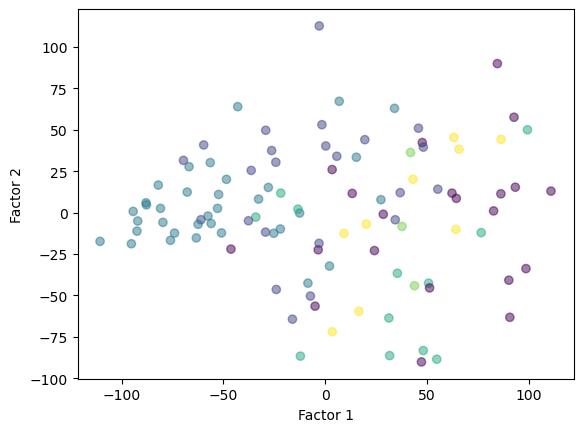

In [69]:
# Realicemos un scatter plot de los datos
plt.scatter(df_pca[0], df_pca[1], alpha=0.5, c=df_withcontinent["Continent"])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

---


Podemos observar que los países más cercanos entre sí no están cerca en el scatterplot. Es decir, que las naciones vecinas reaccionan distinto a la guerra comercial

---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



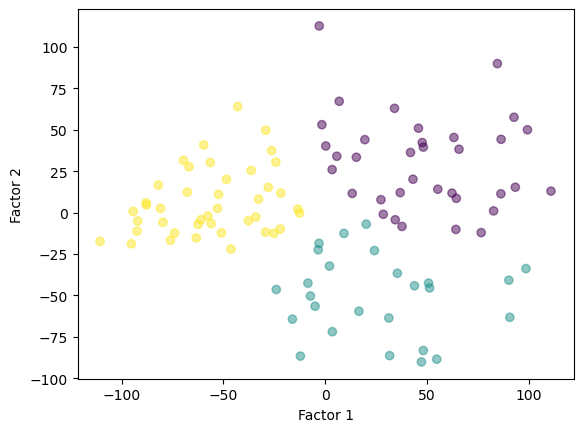

In [70]:
model = KMeans(n_clusters=3, n_init='auto', random_state=42)
model.fit(df_pca)

# Realicemos un scatter plot de los datos
plt.scatter(df_pca[0], df_pca[1], alpha=0.5, c=model.labels_)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [71]:
df_withcontinent["Cluster"] = model.labels_

In [72]:
df_prop = df_withcontinent[["Continent", "Cluster"]]

In [85]:
for cont in df_prop["Continent"].unique():
    tot_cont = len(df_prop[df_prop["Continent"]==cont])
    prop_c1 = round(len(df_prop[(df_prop["Continent"]==cont) & (df_prop["Cluster"]==0)])*100/tot_cont, 2)
    prop_c2 = round(len(df_prop[(df_prop["Continent"]==cont) & (df_prop["Cluster"]==1)])*100/tot_cont, 2)
    prop_c3 = round(len(df_prop[(df_prop["Continent"]==cont) & (df_prop["Cluster"]==2)])*100/tot_cont, 2)

    cont_name = cont_encoding.get(cont)
    print(f'Prop. para {cont_name} de clusters \n -> C1: {prop_c1}% \n -> C2: {prop_c2}% \n -> C3: {prop_c3}%')


Prop. para Europe de clusters 
 -> C1: 11.43% 
 -> C2: 5.71% 
 -> C3: 82.86%
Prop. para South America de clusters 
 -> C1: 55.56% 
 -> C2: 44.44% 
 -> C3: 0.0%
Prop. para Asia de clusters 
 -> C1: 43.48% 
 -> C2: 17.39% 
 -> C3: 39.13%
Prop. para North America de clusters 
 -> C1: 16.67% 
 -> C2: 58.33% 
 -> C3: 25.0%
Prop. para Oceania de clusters 
 -> C1: 66.67% 
 -> C2: 33.33% 
 -> C3: 0.0%
Prop. para Africa de clusters 
 -> C1: 57.14% 
 -> C2: 38.1% 
 -> C3: 4.76%


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [88]:
# Extraer centroides del modelo
centroids = pd.DataFrame(model.cluster_centers_)

# Si queremos usar los nombres de columnas originales, debemos asegurarnos que coincidan en número
# Opción 1: Usar solo las primeras 2 columnas de df_scaled si eso es lo correcto
if len(df_scaled.columns) > model.cluster_centers_.shape[1]:
    column_names = df_scaled.columns[:model.cluster_centers_.shape[1]]
    centroids = pd.DataFrame(model.cluster_centers_, columns=column_names)
# Opción 2: Si model.cluster_centers_ debería tener todas las columnas, revisar el modelo
else:
    centroids = pd.DataFrame(model.cluster_centers_, columns=df_scaled.columns)

# Obtener la característica con mayor magnitud por cluster
max_feature_per_cluster = centroids.abs().idxmax(axis=1)  # Característica con mayor valor absoluto
max_value_per_cluster = centroids.max(axis=1)  # Valor máximo en magnitud

print(pd.DataFrame({"Cluster": range(len(centroids)), 
                    "Max Feature": max_feature_per_cluster, 
                    "Max Value": max_value_per_cluster}))


   Cluster                                        Max Feature  Max Value
0        0  Agricultural raw materials exports (% of merch...  47.796057
1        1  Computer; communications and other services (%...  25.754144
2        2  Agricultural raw materials exports (% of merch...   6.011403


---


*Escriba* su respuesta en esta celda...


---